<a href="https://colab.research.google.com/github/Mainabryan/100-days-challenge-for-machine-learning-practise/blob/main/supevised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### REGRESSION MODEL

## Import the necesary librarries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Load the datset

In [2]:
data = pd.read_csv('/content/saharmart_clv_dataset.csv')

# EDA

In [3]:
data.head()

,CustomerID,CustomerName,Region,TenureMonths,AvgMonthlySpend,PurchaseFrequency,ReturnsLastYear,ReferralSource,CustomerSegment,CustomerLifetimeValue
0,1001,Customer_1,Doha,34,160.42,11,1,Word of Mouth,Mid-tier,4749.77
1,1002,Customer_2,Manama,6,243.52,5,2,Google Ads,Budget,547.92
2,1003,Customer_3,Amman,22,201.99,4,0,Word of Mouth,Mid-tier,1481.26
3,1004,Customer_4,Manama,11,216.55,3,4,Word of Mouth,Budget,476.41
4,1005,Customer_5,Manama,48,242.82,19,1,YouTube,Premium,17531.60


In [4]:
data.tail()

,CustomerID,CustomerName,Region,TenureMonths,AvgMonthlySpend,PurchaseFrequency,ReturnsLastYear,ReferralSource,CustomerSegment,CustomerLifetimeValue
195,1196,Customer_196,Amman,25,23.40,7,4,YouTube,Premium,273.00
196,1197,Customer_197,Amman,24,291.57,12,1,Instagram,Mid-tier,6647.80
197,1198,Customer_198,Dubai,13,32.08,17,3,Instagram,Premium,502.19
198,1199,Customer_199,Manama,58,269.52,13,0,Google Ads,Premium,16934.84
199,1200,Customer_200,Doha,7,167.76,4,0,YouTube,Premium,391.44


In [5]:
data.tail()

,CustomerID,CustomerName,Region,TenureMonths,AvgMonthlySpend,PurchaseFrequency,ReturnsLastYear,ReferralSource,CustomerSegment,CustomerLifetimeValue
195,1196,Customer_196,Amman,25,23.40,7,4,YouTube,Premium,273.00
196,1197,Customer_197,Amman,24,291.57,12,1,Instagram,Mid-tier,6647.80
197,1198,Customer_198,Dubai,13,32.08,17,3,Instagram,Premium,502.19
198,1199,Customer_199,Manama,58,269.52,13,0,Google Ads,Premium,16934.84
199,1200,Customer_200,Doha,7,167.76,4,0,YouTube,Premium,391.44


In [8]:
data.describe(include='all')

,CustomerID,CustomerName,Region,TenureMonths,AvgMonthlySpend,PurchaseFrequency,ReturnsLastYear,ReferralSource,CustomerSegment,CustomerLifetimeValue
count,200.000000,200,200,200.000000,200.000000,200.000000,200.000000,200,200,200.000000
unique,NaN,200,5,NaN,NaN,NaN,NaN,4,3,NaN
top,NaN,Customer_1,Doha,NaN,NaN,NaN,NaN,Word of Mouth,Mid-tier,NaN
freq,NaN,1,49,NaN,NaN,NaN,NaN,61,69,NaN
mean,1100.500000,NaN,NaN,30.705000,156.927050,10.265000,2.050000,NaN,NaN,4043.295000
std,57.879185,NaN,NaN,16.098253,84.599909,5.802856,1.423952,NaN,NaN,4735.888722
min,1001.000000,NaN,NaN,1.000000,23.030000,1.000000,0.000000,NaN,NaN,20.770000
25%,1050.750000,NaN,NaN,19.000000,79.027500,5.000000,1.000000,NaN,NaN,630.415000
50%,1100.500000,NaN,NaN,32.000000,160.650000,11.000000,2.000000,NaN,NaN,1989.820000
75%,1150.250000,NaN,NaN,44.250000,230.732500,15.000000,3.000000,NaN,NaN,5367.490000


In [9]:
data.columns

Index(['CustomerID', 'CustomerName', 'Region', 'TenureMonths',
       'AvgMonthlySpend', 'PurchaseFrequency', 'ReturnsLastYear',
       'ReferralSource', 'CustomerSegment', 'CustomerLifetimeValue'],
      dtype='object')

In [11]:
data.isnull().sum()

,0
CustomerID,0
CustomerName,0
Region,0
TenureMonths,0
AvgMonthlySpend,0
PurchaseFrequency,0
ReturnsLastYear,0
ReferralSource,0
CustomerSegment,0
CustomerLifetimeValue,0


# Corelations

#Data type

In [14]:
data.dtypes

,0
CustomerID,int64
CustomerName,object
Region,object
TenureMonths,int64
AvgMonthlySpend,float64
PurchaseFrequency,int64
ReturnsLastYear,int64
ReferralSource,object
CustomerSegment,object
CustomerLifetimeValue,float64


##Check duplicates

In [15]:
data.duplicated().sum()

np.int64(0)

#correlation

<Axes: >

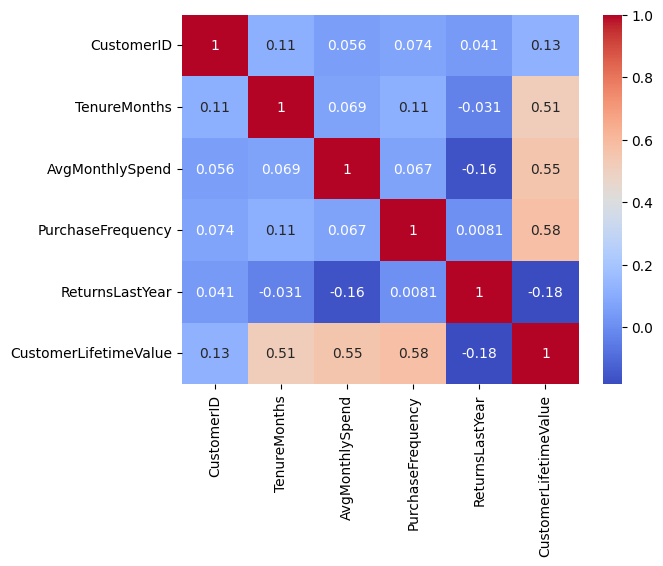

In [23]:
numeric_data = data.select_dtypes(include=np.number)
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='CustomerLifetimeValue', ylabel='Count'>

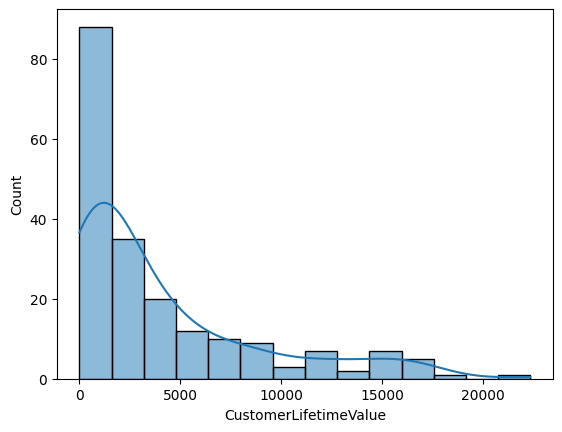

In [18]:
sns.histplot(data['CustomerLifetimeValue'], kde=True)

<Axes: xlabel='CustomerSegment', ylabel='count'>

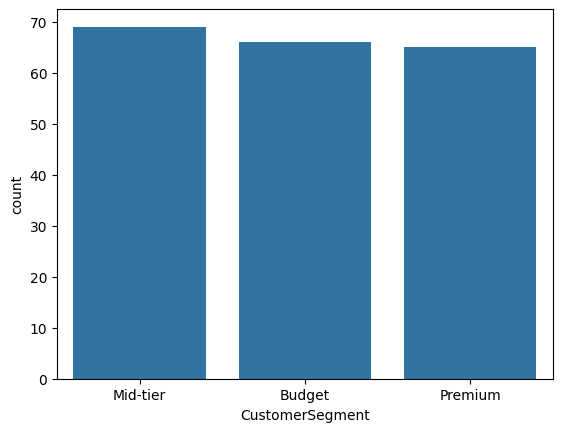

In [20]:
data['CustomerSegment'].value_counts()
sns.countplot(x='CustomerSegment', data=data)

<Axes: xlabel='CustomerSegment', ylabel='CustomerLifetimeValue'>

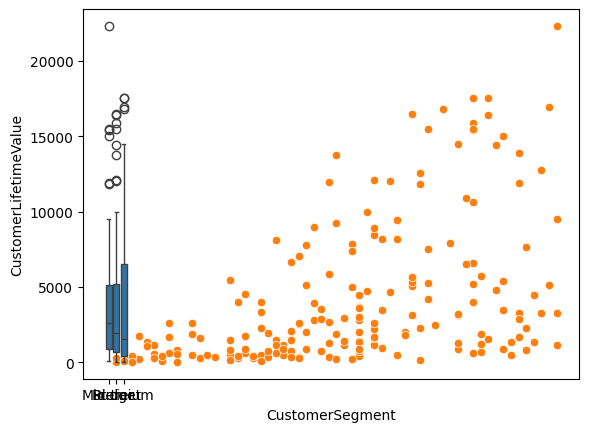

In [22]:
sns.boxplot(x='CustomerSegment', y='CustomerLifetimeValue', data=data)
sns.scatterplot(x='TenureMonths', y='CustomerLifetimeValue', data=data)